# Multiple Linear Regression  
Using Indian Food Dataset (predicting cook_time)


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

sns.set_theme()


# Import data

In [2]:
# Load Indian Food dataset
df_food = pd.read_csv('indian_food.csv')
print("Shape of dataset:", df_food.shape)
df_food.head()

Shape of dataset: (255, 9)


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


# Analyze data

## Describe

In [3]:
# Describe numerical columns
df_food[['prep_time','cook_time']].describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


## Distribution of target variable (cook_time)

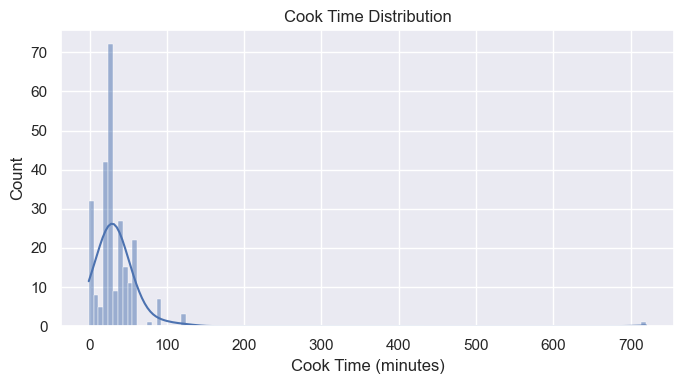

In [4]:
plt.figure(figsize=(7,4))
sns.histplot(df_food['cook_time'], kde=True)
plt.title('Cook Time Distribution')
plt.xlabel('Cook Time (minutes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Relationship between cook_time and prep_time

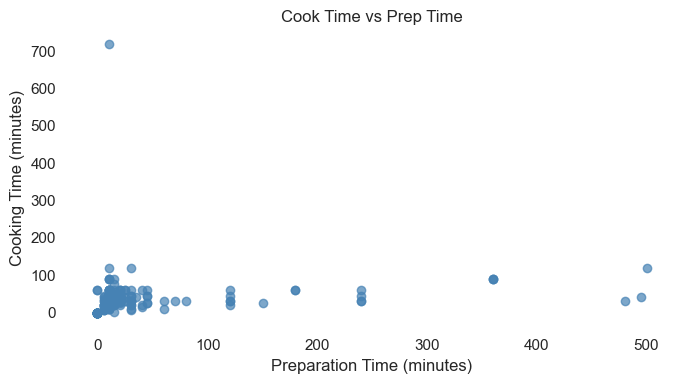

In [5]:
plt.figure(figsize=(7,4))
plt.scatter(df_food['prep_time'], df_food['cook_time'], color='steelblue', alpha=0.7)
plt.title('Cook Time vs Prep Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')
plt.box(False)
plt.tight_layout()
plt.show()

## Average cook_time by region

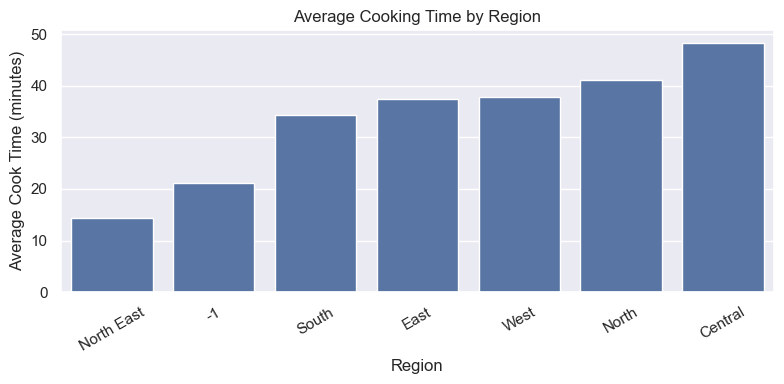

In [6]:
plt.figure(figsize=(8,4))
region_means = df_food.groupby('region')['cook_time'].mean().sort_values()
sns.barplot(x=region_means.index, y=region_means.values)
plt.title('Average Cooking Time by Region')
plt.xlabel('Region')
plt.ylabel('Average Cook Time (minutes)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Split dataset into dependent and independent variables

In [7]:
# We want to predict 'cook_time' (dependent variable)
# We will use:
# - prep_time (numeric)
# - diet (categorical)
# - course (categorical)
# - region (categorical)

df_model = df_food[['prep_time','diet','course','region','cook_time']].dropna()

X = df_model[['prep_time','diet','course','region']]
y = df_model['cook_time']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
X.head()

Shape of X: (254, 4)
Shape of y: (254,)


,prep_time,diet,course,region
0,45,vegetarian,dessert,East
1,80,vegetarian,dessert,West
2,15,vegetarian,dessert,North
3,15,vegetarian,dessert,West
4,15,vegetarian,dessert,East


# One-hot encoding of categorical data

In [8]:
# Identify categorical and numeric columns
categorical_cols = ['diet','course','region']
numeric_cols = ['prep_time']

# ColumnTransformer for one-hot encoding categorical features
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)

X_encoded = ct.fit_transform(X)

print("Shape after encoding:", X_encoded.shape)

Shape after encoding: (254, 11)


# Split dataset into train and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=0
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 203
Test set size: 51


# Train multiple regression model

In [10]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


# Predict results

In [11]:
y_pred = regressor.predict(X_test)

print("First 5 predictions:", y_pred[:5])
print("First 5 actual values:", np.array(y_test)[:5])

First 5 predictions: [25.41837903 37.66152255 38.66777143 36.69505743 27.2889491 ]
First 5 actual values: [20 90 25 30 20]


# Evaluate model performance

In [12]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("R² score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R² score: 0.026264509202361452
MSE: 435.24366649107947
RMSE: 20.86249425382975
MAE: 15.670329878806


# Compare predictions with actual values

In [13]:
# Combine actual and predicted values side by side
comparison = pd.DataFrame({
    'Actual cook_time': y_test.values,
    'Predicted cook_time': y_pred
}).reset_index(drop=True)

comparison.head(10)

,Actual cook_time,Predicted cook_time
0,20,25.418379
1,90,37.661523
2,25,38.667771
3,30,36.695057
4,20,27.288949
5,30,37.661523
6,40,35.688809
7,-1,12.880374
8,55,55.611550
9,30,26.424628


## Interpretation

In this notebook, we used **Multiple Linear Regression** on the Indian Food dataset to predict `cook_time` using:

- `prep_time` (numeric)
- `diet` (categorical, one-hot encoded)
- `course` (categorical, one-hot encoded)
- `region` (categorical, one-hot encoded)

The model's performance is summarised by R², MSE, RMSE and MAE.  
You can interpret:

- R² as the proportion of variance in cooking time explained by the selected features.  
- Error metrics (MSE, RMSE, MAE) as different measures of average prediction error in minutes.

You can experiment further by adding or removing features (for example, using `flavor_profile` or `state`)  
and comparing how the model performance changes.
